In [56]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import plotly

In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')

In [24]:
df = pd.read_csv('data/quotes.csv')
df.head()

,quote,author,tag1,tag2,tag3,tag4,tag5,tag6
0,It is better to keep your mouth closed and let...,Mark Twain,Fool,Your,Better,NaN,NaN,NaN
1,A certain amount of opposition is a great help...,Lewis Mumford,Great,Man,Wind,NaN,NaN,NaN
2,"If you don't know where you are going, you mig...",Yogi Berra,Wind,Know,Where,NaN,NaN,NaN
3,You're either part of the solution or you're p...,Eldridge Cleaver,Solution,Problem,Either,NaN,NaN,NaN
4,Be nice to people on your way up because you'l...,Wilson Mizner,Your,Way,People,NaN,NaN,NaN


In [17]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [25]:
df['sentiment_compound'] = df.quote.apply(sentimentAnalysis)

In [40]:
df.to_csv('data/quotes_sentiment.csv', index=False)

In [41]:
df.to_json("data/quotes_sentiment.json", orient="records")

In [28]:
df

,quote,author,tag1,tag2,tag3,tag4,tag5,tag6,sentiment_compound
0,It is better to keep your mouth closed and let...,Mark Twain,Fool,Your,Better,NaN,NaN,NaN,-0.3612
1,A certain amount of opposition is a great help...,Lewis Mumford,Great,Man,Wind,NaN,NaN,NaN,0.8360
2,"If you don't know where you are going, you mig...",Yogi Berra,Wind,Know,Where,NaN,NaN,NaN,0.0000
3,You're either part of the solution or you're p...,Eldridge Cleaver,Solution,Problem,Either,NaN,NaN,NaN,-0.1027
4,Be nice to people on your way up because you'l...,Wilson Mizner,Your,Way,People,NaN,NaN,NaN,0.4215
...,...,...,...,...,...,...,...,...,...
212,I was super brainy and a proper geek at school...,Ellie Goulding,Always,Me,Feeling,NaN,NaN,NaN,0.0414
213,You can't be taught to be brainy. You've eithe...,Samantha Fox,Either,Got,Taught,NaN,NaN,NaN,0.0000
214,"I'm reading a book, because I'm brainy. No, it...",Craig Ferguson,Know,Reading,Book,NaN,NaN,NaN,0.0772
215,"If kids and teenagers can get into a band, it'...",Ezra Koenig,Band,Think,Kids,NaN,NaN,NaN,0.0000


In [37]:
resumen = df.groupby(['author'])['sentiment_compound'].mean().sort_values()
resumen

author
James Joyce                   0.6369
Ansel Adams                   0.6486
Evan Davis                    0.6597
John Ruskin                   0.6761
Saul Bellow                   0.6908
Robert Staughton Lynd         0.7096
Johann Wolfgang von Goethe    0.7172
Gilbert Parker                0.7184
Theodore Roosevelt            0.7351
Thomas a Kempis               0.7359
Ivan Turgenev                 0.7717
Joseph Roux                   0.7717
Charles Baudelaire            0.7845
Charles Simmons               0.7845
Ninon de L'Enclos             0.7906
Josh Hutcherson               0.8002
Albert Ellis                  0.8316
Lewis Mumford                 0.8360
Paula Pell                    0.9129
Nelly Furtado                 0.9512
Name: sentiment_compound, dtype: float64

<AxesSubplot:xlabel='author'>

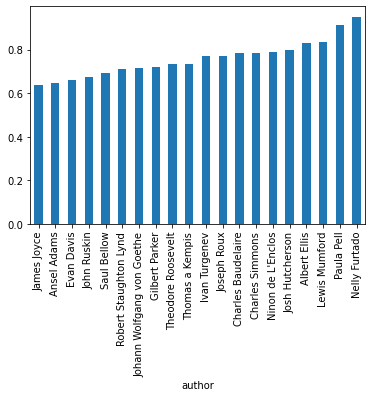

In [38]:
resumen.tail(20).plot(kind="bar")

<AxesSubplot:xlabel='author'>

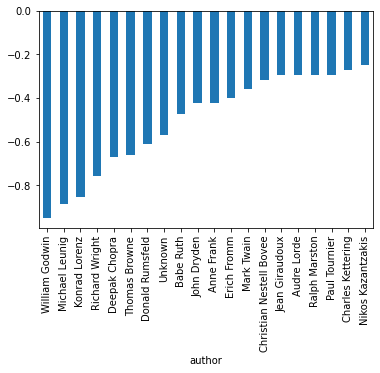

In [39]:
resumen.head(20).plot(kind="bar")

<AxesSubplot:title={'center':'Sentiment Polarity Distribution'}, ylabel='Frequency'>

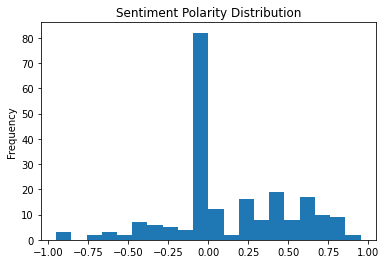

In [64]:
df['sentiment_compound'].plot(
    kind='hist',
    bins=20,
    title='Sentiment Polarity Distribution')